In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
#  Load the dataset
df = pd.read_csv("50_Startups.csv") 
print(df.head(5))

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [7]:
# check for nulls
print(df.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [9]:
df.describe

<bound method NDFrame.describe of     R&D Spend  Administration  Marketing Spend     Profit
0   165349.20       136897.80        471784.10  192261.83
1   162597.70       151377.59        443898.53  191792.06
2   153441.51       101145.55        407934.54  191050.39
3   144372.41       118671.85        383199.62  182901.99
4   142107.34        91391.77        366168.42  166187.94
5   131876.90        99814.71        362861.36  156991.12
6   134615.46       147198.87        127716.82  156122.51
7   130298.13       145530.06        323876.68  155752.60
8   120542.52       148718.95        311613.29  152211.77
9   123334.88       108679.17        304981.62  149759.96
10  101913.08       110594.11        229160.95  146121.95
11  100671.96        91790.61        249744.55  144259.40
12   93863.75       127320.38        249839.44  141585.52
13   91992.39       135495.07        252664.93  134307.35
14  119943.24       156547.42        256512.92  132602.65
15  114523.61       122616.84        2

In [10]:
#Define features and target
X = df.drop(columns=['Profit'])
y = df["Profit"]

In [11]:

#  Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#  Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train, predict and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Adjusted R²
    n = len(y_test)
    k = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
    
    # Store results
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "Adjusted R2": adj_r2
    })

# Display results as a DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Adjusted R2", ascending=False))



               Model           MAE           MSE          RMSE        R2  \
4      Random Forest   6437.497740  7.262501e+07   8522.030780  0.910316   
2   Lasso Regression   6979.152235  8.092632e+07   8995.905778  0.900065   
0  Linear Regression   6979.152252  8.092632e+07   8995.905803  0.900065   
1   Ridge Regression   6979.152252  8.092632e+07   8995.905803  0.900065   
3      Decision Tree  13755.664000  4.000265e+08  20000.661970  0.506013   

   Adjusted R2  
4     0.865475  
2     0.850098  
0     0.850098  
1     0.850098  
3     0.259020  


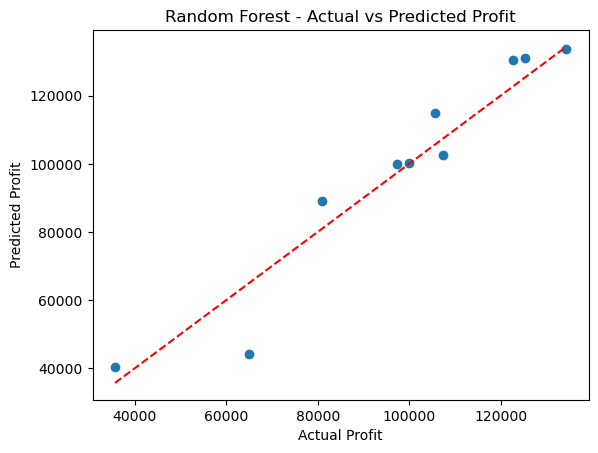

In [15]:
#  Plot actual vs predicted for the best model
best_model_name = results_df.sort_values(by="Adjusted R2", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)

plt.scatter(y_test, best_pred)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title(f"{best_model_name} - Actual vs Predicted Profit")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
